In [1]:
import tensorflow


In [3]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils

In [9]:
train = pd.read_csv("./fashion-mnist_train.csv").values
test = pd.read_csv("./fashion-mnist_test.csv").values

In [10]:
X= train[:,1:]
Y =train[:,0]


In [31]:
X.shape
X= X/255.0

In [14]:
np.unique(Y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [18]:
X_train = X.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(Y)

In [19]:
print(X_train.shape,Y_train.shape)

(60000, 28, 28, 1) (60000, 10)


In [21]:
import matplotlib.pyplot as plt

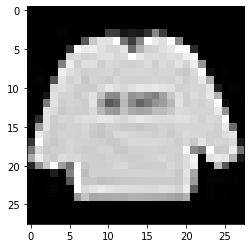

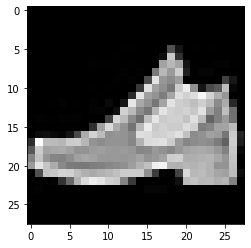

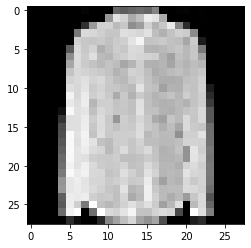

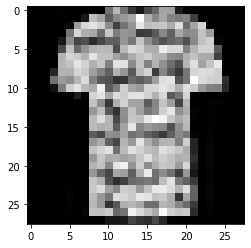

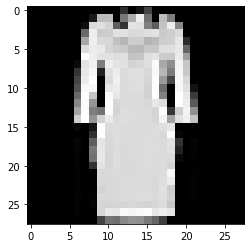

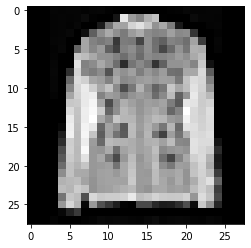

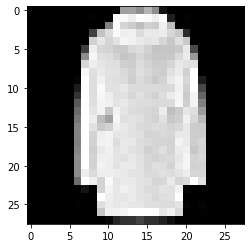

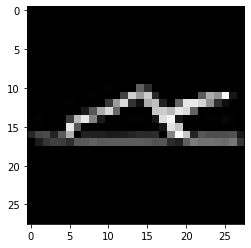

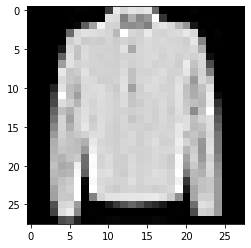

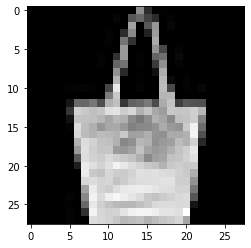

In [25]:
for i in range(10):
    plt.imshow(X_train[i],cmap='gray')
    plt.show()

In [28]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape= (28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten (Flatten)            (None, 128)              

In [29]:
model.compile(loss="categorical_crossentropy",optimizer ="adam",metrics=['accuracy'])

In [30]:
hist = model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=512,validation_split=0.20)

Epoch 1/20
94/94 [==============================] - 81s 860ms/step - loss: 1.0136 - accuracy: 0.6359 - val_loss: 0.6487 - val_accuracy: 0.7682
Epoch 2/20
94/94 [==============================] - 78s 834ms/step - loss: 0.5445 - accuracy: 0.8019 - val_loss: 0.5120 - val_accuracy: 0.8208
Epoch 3/20
94/94 [==============================] - 75s 795ms/step - loss: 0.4623 - accuracy: 0.8342 - val_loss: 0.4537 - val_accuracy: 0.8481
Epoch 4/20
94/94 [==============================] - 73s 781ms/step - loss: 0.4162 - accuracy: 0.8523 - val_loss: 0.4166 - val_accuracy: 0.8556
Epoch 5/20
94/94 [==============================] - 73s 779ms/step - loss: 0.3813 - accuracy: 0.8638 - val_loss: 0.3860 - val_accuracy: 0.8688
Epoch 6/20
94/94 [==============================] - 73s 780ms/step - loss: 0.3634 - accuracy: 0.8701 - val_loss: 0.3766 - val_accuracy: 0.8728
Epoch 7/20
94/94 [==============================] - 73s 782ms/step - loss: 0.3404 - accuracy: 0.8776 - val_loss: 0.3593 - val_accuracy: 0.8786

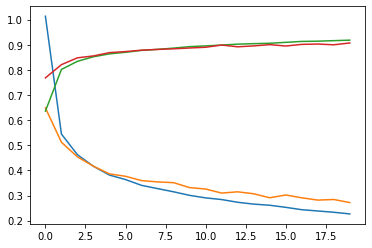

In [34]:
plt.figure(0)
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label ='val_loss')
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label ='val_acc')
plt.show()

In [35]:
test

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 1, 0],
       [8, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
x_test = test[:,1:]
y_test =test[:,0]

In [37]:
x_test =x_test/255

In [39]:
X_test = x_test.reshape((-1,28,28,1))
Y_test = np_utils.to_categorical(y_test)

In [40]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.2565 - accuracy: 0.9098


[0.2565401494503021, 0.9097999930381775]